

# swr_df.csv description:
* Each row represents a unique sharp wave ripple event
* each column represents a feature of each sharp wave ripple
* Columns:
    * start_time:  start time of ripple
    * end_time: end time of ripple
    * ripple_duration: how long was the ripple in seconds
    * max_emg: emg contamination at time of ripple
    * peak_time: time that the ripple was maximized
    * peak_channel: channel that maximized the ripple
    * peak_amplitude: zscored ripple amplitude
    * peak_freq: frequency of ripple
    * clipped: percent of ripple that is clipped or flatlined
    * session: recording session identification
    * area: brain area were ripple occured (ca1,ca3,cortex)
    * ep_type: epoch type where each ripple occured
    * group: group identification
    * rat: rat ID
    
## Nested diagram

* group
    * rat
        * session
            * epoch
                * ripple event

For our current purposes, epoch can be ignored as we just want to see if features of sharp wave ripples are similar between groups

In [1]:
library(tidyverse)
library(lme4)
library(lmerTest)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'Matrix'

The fo

### Load data and only keep hippocampal sessions

In [4]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/swr_df.csv')

df_inter_ripple = read.csv('F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/df_ripple_rate.csv')

# only keep hippocampal events
idx <- data$area == 'cortex'
data = data[!idx,]
print(summary(data))

idx <- df_inter_ripple$area == 'cortex'
df_inter_ripple = df_inter_ripple[!idx,]
print(summary(df_inter_ripple))

       X         ripple_number      start_time        end_time       
 Min.   :    0   Min.   :   0.0   Min.   :   0.0   Min.   :   0.239  
 1st Qu.: 4984   1st Qu.: 173.0   1st Qu.: 691.7   1st Qu.: 691.734  
 Median : 9568   Median : 393.0   Median :1707.5   Median :1707.588  
 Mean   : 9504   Mean   : 573.3   Mean   :1740.3   Mean   :1740.425  
 3rd Qu.:14144   3rd Qu.: 850.0   3rd Qu.:2562.8   3rd Qu.:2563.027  
 Max.   :18732   Max.   :3665.0   Max.   :6172.0   Max.   :6172.226  
                                                                     
 ripple_duration     max_emg          peak_time         peak_channel 
 Min.   :0.0248   Min.   :-0.0709   Min.   :   0.002   Min.   : 0.0  
 1st Qu.:0.0720   1st Qu.: 0.3041   1st Qu.: 691.690   1st Qu.: 3.0  
 Median :0.1048   Median : 0.4092   Median :1707.578   Median : 6.0  
 Mean   :0.1227   Mean   : 0.4579   Mean   :1740.365   Mean   :13.6  
 3rd Qu.:0.1512   3rd Qu.: 0.5644   3rd Qu.:2562.897   3rd Qu.:17.0  
 Max.   :0.9864   Ma

### label factors as factors

In [5]:
data$group = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$ep_type = factor(data$ep_type, levels=c('pedestal_1', 'track','pedestal_2','cylinder_1','pedestal_3','cylinder_2','pedestal_4'))
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

df_inter_ripple$group = factor(df_inter_ripple$group, levels=c('control', 'pae'))
df_inter_ripple$rat = factor(df_inter_ripple$rat)
df_inter_ripple$session = factor(df_inter_ripple$session)
df_inter_ripple$area = factor(df_inter_ripple$area, levels=c('ca1', 'ca3'))

### Lets look at numbers of ripples per group, rat, and area

In [6]:
print('ripple df')
xtabs(~group+rat+area,data=data)


[1] "ripple df"


, , area = ca1

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS17 LS19 LS23 RH13
  control     722     263       0       0    2300       0    0    0  120    3
  pae           0       0     933       0       0       0   89  233    0    0
         rat
group     RH14 RH16
  control    1    0
  pae        0   34

, , area = ca3

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS17 LS19 LS23 RH13
  control     765     189       0       0    5113       0    0    0    0    8
  pae           0       0     644    2498       0    4117    0    0    0    0
         rat
group     RH14 RH16
  control    9    0
  pae        0    0


In [7]:
print('df_inter_ripple')
xtabs(~group+rat+area,data=df_inter_ripple)

[1] "df_inter_ripple"


, , area = ca1

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS17 LS19 LS23 RH13
  control      12       5       0       0       7       0    0    0    4    1
  pae           0       0      23       0       0       0    6   15    0    0
         rat
group     RH14 RH16
  control    1    0
  pae        0    7

, , area = ca3

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS17 LS19 LS23 RH13
  control      18       7       0       0      21       0    0    0    0    3
  pae           0       0      15      36       0      22    0    0    0    0
         rat
group     RH14 RH16
  control    1    0
  pae        0    0


### plot distributions of variables of interests

Split data into rat by region

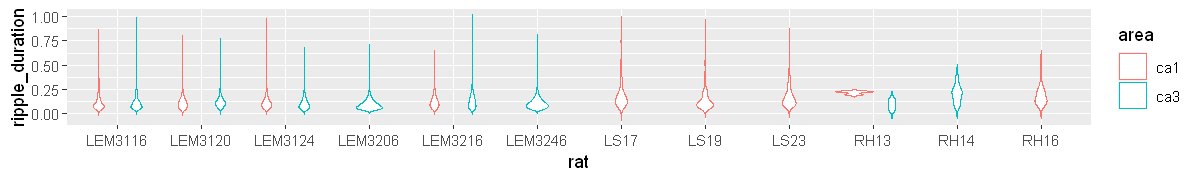

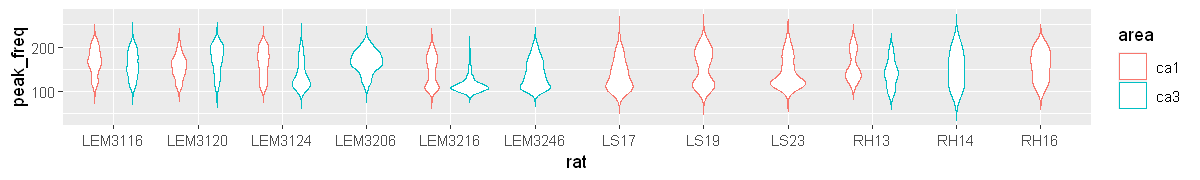

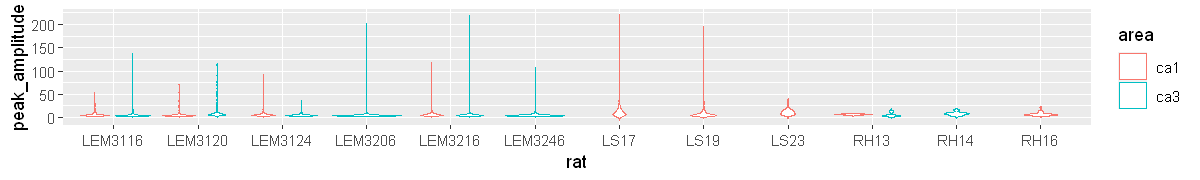

In [16]:
options(repr.plot.width = 10, repr.plot.height = 1.5)

p<-ggplot(data, aes(x=rat, y=ripple_duration, color=area)) +
    geom_violin(trim=FALSE)
p

p<-ggplot(data, aes(x=rat, y=peak_freq, color=area)) +
    geom_violin(trim=FALSE)
p

p<-ggplot(data, aes(x=rat, y=peak_amplitude, color=area)) +
    geom_violin(trim=FALSE)
p

In [64]:
summary(df_inter_ripple)

       X                             session     area         counts      
 Min.   :  0.00   LEM3124_S20190307132509:  2   ca1: 81   Min.   :  1.00  
 1st Qu.: 57.75   LEM3124_S20190307163732:  2   ca3:123   1st Qu.: 10.00  
 Median :118.50   LEM3124_S20190309145324:  2             Median : 33.00  
 Mean   :113.93   LEM3124_S20190311161641:  2             Mean   : 88.44  
 3rd Qu.:169.25   LEM3124_S20190315160017:  2             3rd Qu.: 79.25  
 Max.   :220.00   LEM3124_S20190319154019:  2             Max.   :983.00  
                  (Other)                :192                             
  ripple_rate           group          rat    
 Min.   :0.000521   control: 80   LEM3124:38  
 1st Qu.:0.012210   pae    :124   LEM3206:36  
 Median :0.036449                 LEM3116:30  
 Mean   :0.074858                 LEM3216:28  
 3rd Qu.:0.082028                 LEM3246:22  
 Max.   :0.481211                 LS19   :15  
                                  (Other):35  

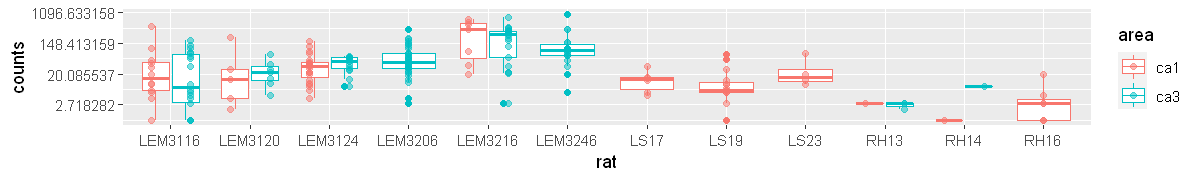

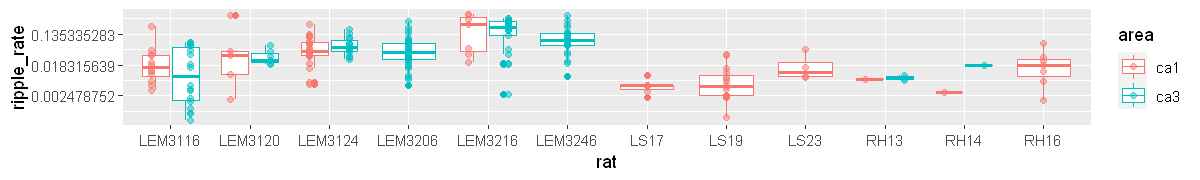

In [82]:
options(repr.plot.width = 10, repr.plot.height = 1.5)

p<-ggplot(df_inter_ripple, aes(x=rat, y=counts, color=area)) +
    geom_boxplot() +
    geom_jitter(position=position_dodge(1),alpha=.5) +
    scale_y_continuous(trans='log')
p

p<-ggplot(df_inter_ripple, aes(x=rat, y=ripple_rate, color=area)) +
    geom_boxplot() +
    geom_jitter(position=position_dodge(1),alpha=.5) +
    scale_y_continuous(trans='log')
p

### run linear effect model where sessions are nested within rats

ca1 ripple duration

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,7232.960,7258.780,-3612.480,7224.960,NA,NA,NA
m1,5,7234.949,7267.224,-3612.475,7224.949,0.01116902,1,0.9158334


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: ripple_duration_log ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
  7234.9   7267.2  -3612.5   7224.9     4693 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2586 -0.6653 -0.0337  0.6538  3.7855 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.047798 0.21863 
 rat         (Intercept) 0.009308 0.09648 
 Residual                0.264839 0.51463 
Number of obs: 4698, groups:  session:rat, 81; rat, 10

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) -2.02463    0.06773 10.89859 -29.891 8.29e-12 ***
grouppae     0.01003    0.09414  8.84582   0.107    0.918    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.720

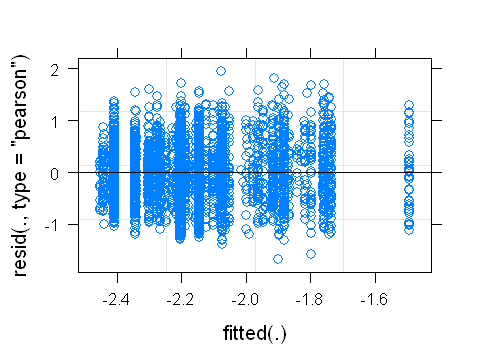

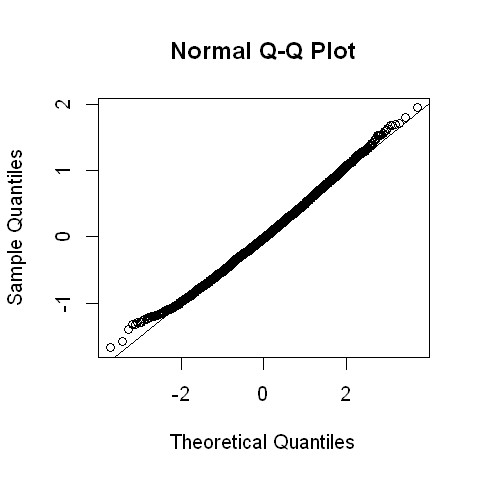

In [52]:
# log transform ripple_duration
data$ripple_duration_log <- log(data$ripple_duration)

m1 = lmer(ripple_duration_log ~ group + (1 | rat/session), data = data[data$area == "ca1",],REML=FALSE)
m1.null = lmer(ripple_duration_log ~ 1 + (1 | rat/session), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)  
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))



ca3 ripple duration

In [57]:
median(data$ripple_duration[data$area == "ca3" & data$group == "control"])-
    median(data$ripple_duration[data$area == "ca3" & data$group == "pae"])

[1] 0.0232

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,20282.82,20312.82,-10137.41,20274.82,NA,NA,NA
m1,5,20275.31,20312.81,-10132.66,20265.31,9.509663,1,0.002043927


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: ripple_duration_log ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
 20275.3  20312.8 -10132.7  20265.3    13338 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0494 -0.6774  0.0113  0.6756  4.4426 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.019285 0.13887 
 rat         (Intercept) 0.001086 0.03295 
 Residual                0.263295 0.51312 
Number of obs: 13343, groups:  session:rat, 123; rat, 8

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) -2.17421    0.03189  9.42734 -68.171 5.09e-14 ***
grouppae    -0.19755    0.04182  7.03320  -4.723  0.00212 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.763

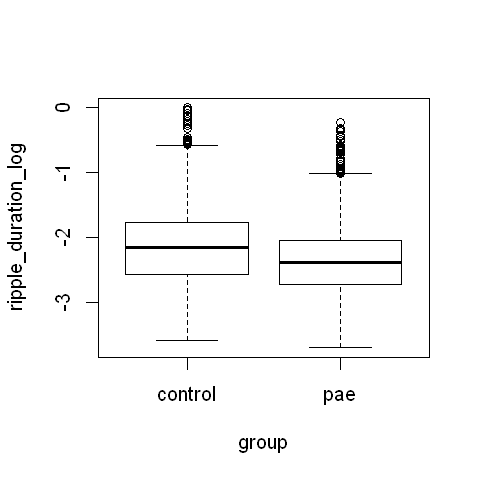

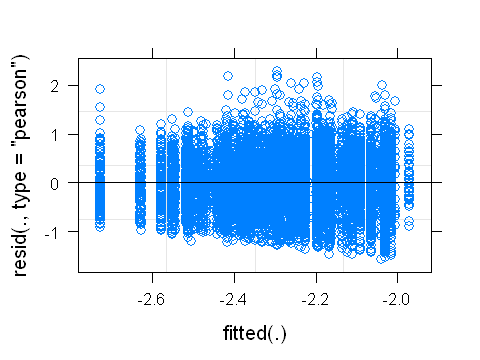

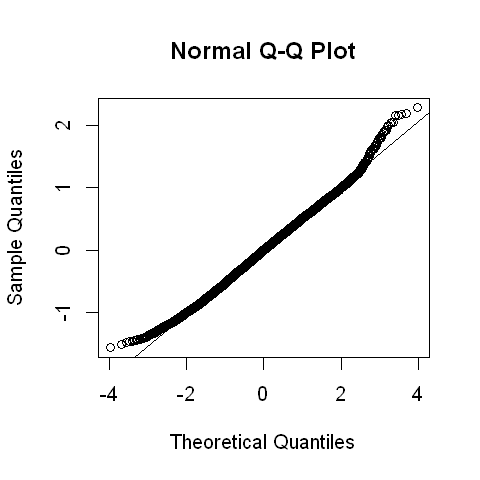

In [51]:
m1 = lmer(ripple_duration_log ~ group + (1 | rat/session), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(ripple_duration_log ~ 1 + (1 | rat/session), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)
summary(m1)
plot(ripple_duration_log ~ group, data = data[data$area == "ca3",])

options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

ca1 peak frequency

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-9042.748,-9016.929,4525.374,-9050.748,NA,NA,NA
m1,5,-9041.686,-9009.411,4525.843,-9051.686,0.9371914,1,0.3330012


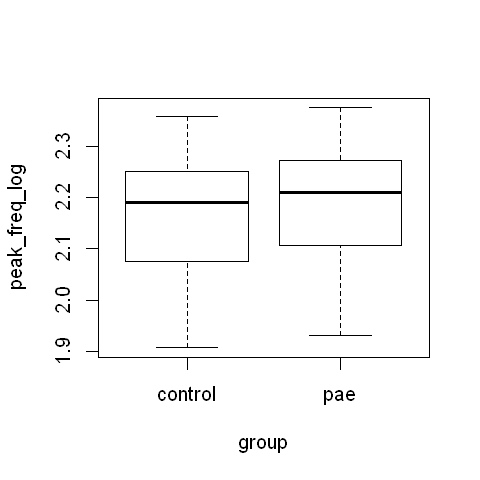

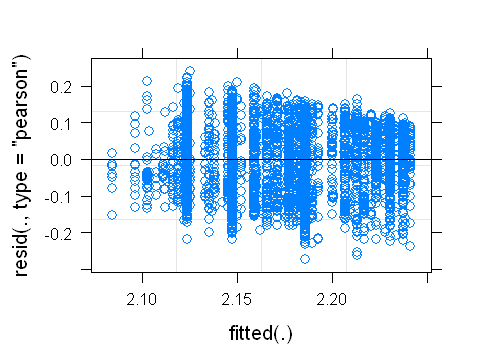

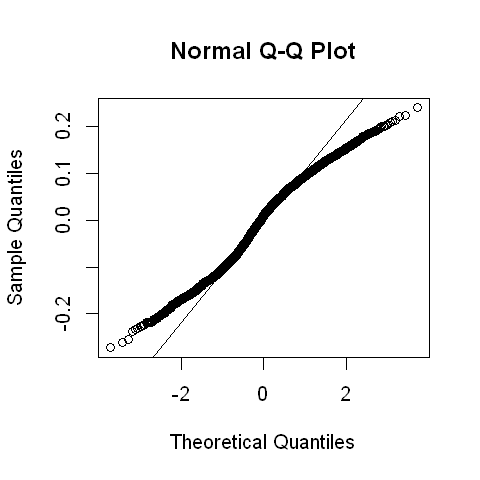

In [48]:
# log transform peak frequency
data$peak_freq_log <- log10(data$peak_freq)


m1 = lmer(peak_freq_log ~ group + (1 | rat/session), data = data[data$area == "ca1",],REML=FALSE)
m1.null = lmer(peak_freq_log ~ 1 + (1 | rat/session), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)

plot(peak_freq_log ~ group, data = data[data$area == "ca1",])

options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

ca3 peak frequency

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-32435.19,-32405.19,16221.59,-32443.19,NA,NA,NA
m1,5,-32433.24,-32395.75,16221.62,-32443.24,0.05414031,1,0.8160094


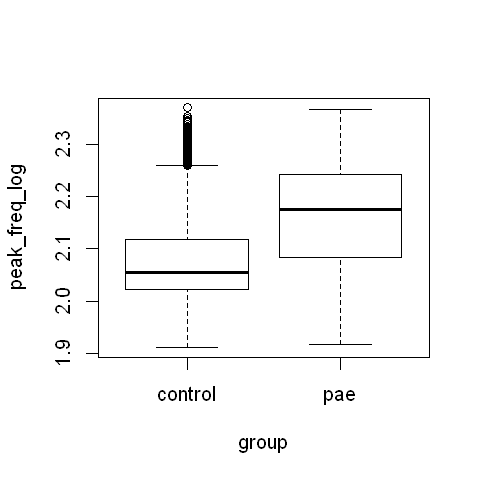

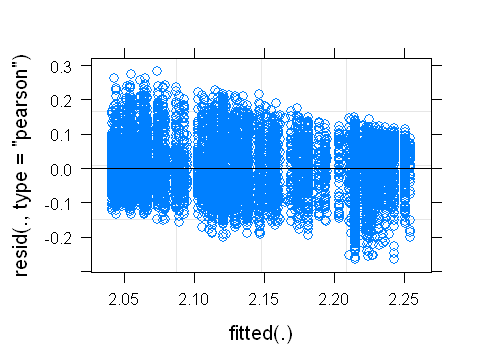

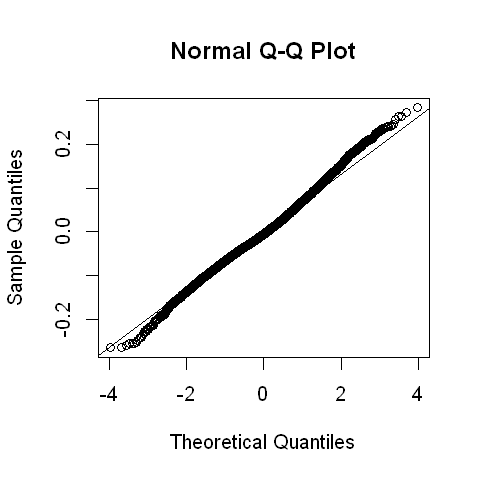

In [49]:
m1 = lmer(peak_freq_log ~ group + (1 | rat/session), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(peak_freq_log ~ 1 + (1 | rat/session), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)

plot(peak_freq_log ~ group, data = data[data$area == "ca3",])

options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

ca1 peak amplitude

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-8944.553,-8918.733,4476.276,-8952.553,NA,NA,NA
m1,5,-8942.623,-8910.349,4476.312,-8952.623,0.07015655,1,0.791109


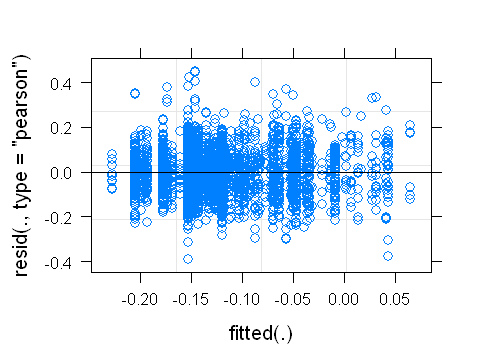

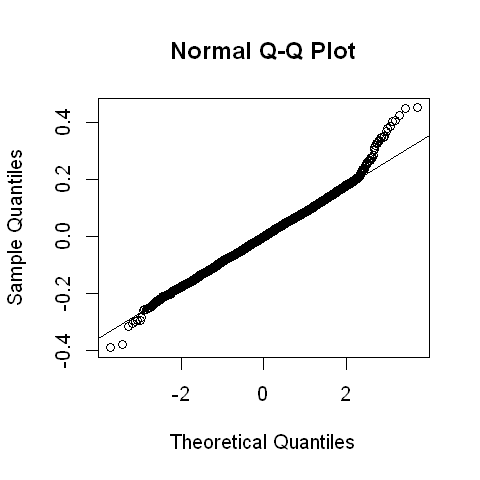

In [35]:
# log transform peak frequency
data$peak_amplitude_log <- log10(log10(data$peak_amplitude))

m1 = lmer(peak_amplitude_log ~ group + (1 | rat/session), data = data[data$area == "ca1",],REML=FALSE)
# summary(m1)
m1.null = lmer(peak_amplitude_log ~ 1 + (1 | rat/session), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)

options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))


ca3 peak amplitude

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-25547.80,-25517.80,12777.90,-25555.80,NA,NA,NA
m1,5,-25548.32,-25510.82,12779.16,-25558.32,2.520374,1,0.1123839


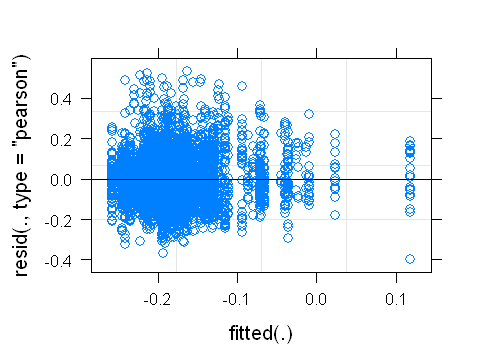

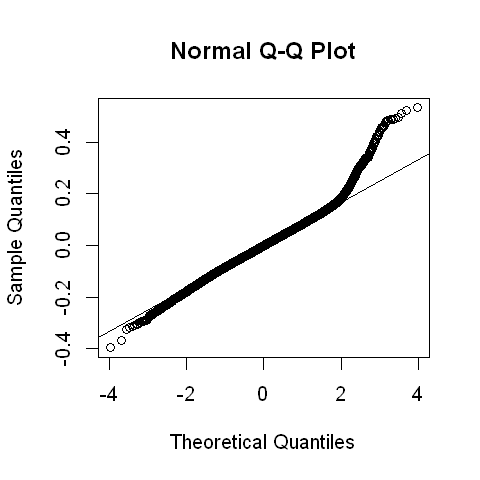

In [36]:
m1 = lmer(peak_amplitude_log ~ group + (1 | rat/session), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(peak_amplitude_log ~ 1 + (1 | rat/session), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)

options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

In [83]:
summary(df_inter_ripple)

       X                             session     area         counts      
 Min.   :  0.00   LEM3124_S20190307132509:  2   ca1: 81   Min.   :  1.00  
 1st Qu.: 57.75   LEM3124_S20190307163732:  2   ca3:123   1st Qu.: 10.00  
 Median :118.50   LEM3124_S20190309145324:  2             Median : 33.00  
 Mean   :113.93   LEM3124_S20190311161641:  2             Mean   : 88.44  
 3rd Qu.:169.25   LEM3124_S20190315160017:  2             3rd Qu.: 79.25  
 Max.   :220.00   LEM3124_S20190319154019:  2             Max.   :983.00  
                  (Other)                :192                             
  ripple_rate           group          rat    
 Min.   :0.000521   control: 80   LEM3124:38  
 1st Qu.:0.012210   pae    :124   LEM3206:36  
 Median :0.036449                 LEM3116:30  
 Mean   :0.074858                 LEM3216:28  
 3rd Qu.:0.082028                 LEM3246:22  
 Max.   :0.481211                 LS19   :15  
                                  (Other):35  

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,269.3987,276.5821,-131.6994,263.3987,NA,NA,NA
m1,4,270.5331,280.1109,-131.2666,262.5331,0.8656004,1,0.3521762


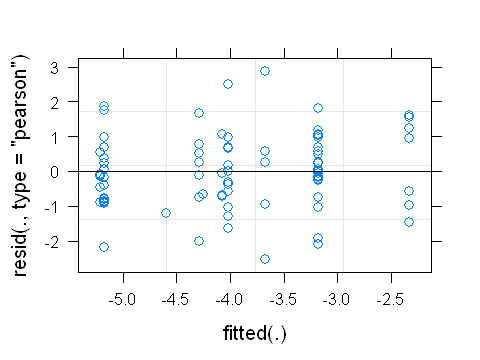

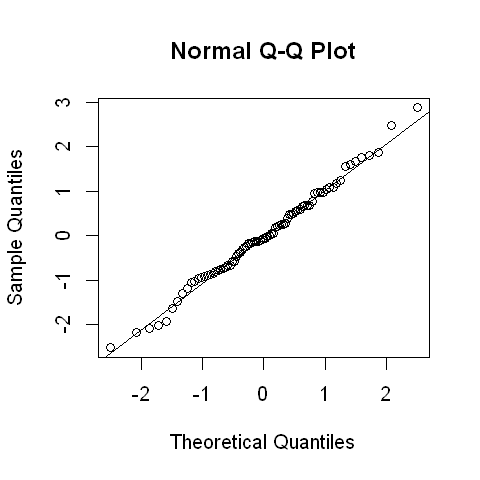

In [9]:
df_inter_ripple$ripple_rate_log = log(df_inter_ripple$ripple_rate)

m1 = lmer(ripple_rate_log ~ group + (1 | rat), data = df_inter_ripple[df_inter_ripple$area == "ca1",],REML=FALSE)
m1.null = lmer(ripple_rate_log ~ 1 + (1 | rat), data = df_inter_ripple[df_inter_ripple$area == "ca1",], REML=FALSE)
anova(m1.null, m1)

options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,399.0621,407.4986,-196.5310,393.0621,NA,NA,NA
m1,4,399.2706,410.5194,-195.6353,391.2706,1.791421,1,0.1807531


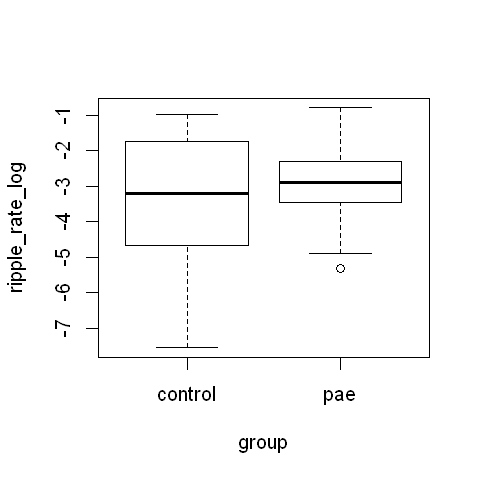

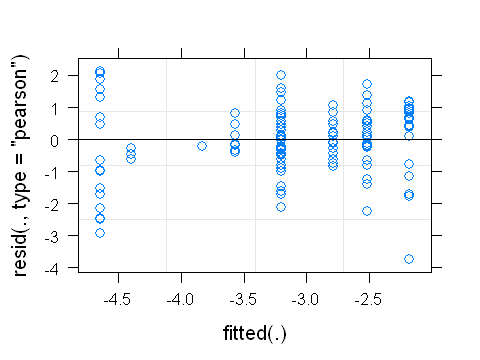

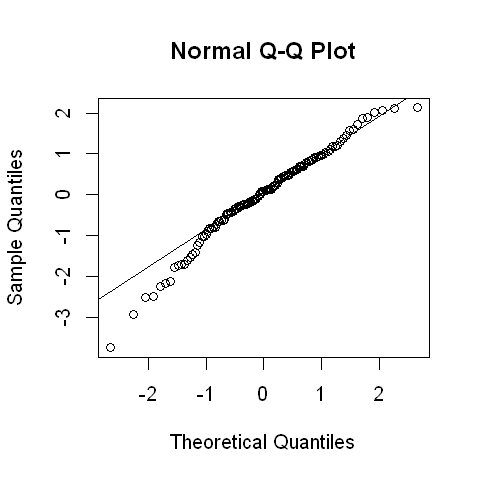

In [50]:
m1 = lmer(ripple_rate_log ~ group + (1 | rat), data = df_inter_ripple[df_inter_ripple$area == "ca3",],REML=FALSE)
m1.null = lmer(ripple_rate_log ~ 1 + (1 | rat), data = df_inter_ripple[df_inter_ripple$area == "ca3",], REML=FALSE)
anova(m1.null, m1)
plot(ripple_rate_log ~ group, data =  df_inter_ripple[df_inter_ripple$area == "ca3",])

options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

In [ ]:
# m1 = lmer(ripple_rate_log ~ group + (1 | rat), data = df_inter_ripple[df_inter_ripple$area == "ca3",],REML=FALSE)
# summary(m1)
# plot(ripple_rate_log ~ group, data = df_inter_ripple[df_inter_ripple$area == "ca3",])
# abline(m1)



# compare the proportion of ripples above 100ms

In [8]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/df_prop_100ms.csv')


data$groupup = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

summary(data)

       X                             session         rat         group    
 Min.   :  0.00   LEM3124_S20190307132509:  2   LEM3124:38   control: 80  
 1st Qu.: 50.75   LEM3124_S20190307163732:  2   LEM3206:36   pae    :124  
 Median :101.50   LEM3124_S20190309145324:  2   LEM3116:30                
 Mean   :101.50   LEM3124_S20190311161641:  2   LEM3216:28                
 3rd Qu.:152.25   LEM3124_S20190315160017:  2   LEM3246:22                
 Max.   :203.00   LEM3124_S20190319154019:  2   LS19   :15                
                  (Other)                :192   (Other):35                
  area         n_rip          prop_above        groupup   
 ca1: 81   Min.   :  1.00   Min.   :0.0000   control: 80  
 ca3:123   1st Qu.: 10.00   1st Qu.:0.4000   pae    :124  
           Median : 33.00   Median :0.5282                
           Mean   : 88.44   Mean   :0.5558                
           3rd Qu.: 79.25   3rd Qu.:0.6828                
           Max.   :983.00   Max.   :1.0000    

In [9]:
overdisp.glmer <- function(model) {
  ## From http://glmm.wikidot.com/faq
  ## number of variance parameters in 
  ##   an n-by-n variance-covariance matrix
  vpars <- function(m) {
    nrow(m)*(nrow(m)+1)/2
  }
  model.df <- sum(sapply(lme4::VarCorr(model),vpars))+length(lme4::fixef(model))
  rdf <- nrow(model.frame(model))-model.df
  rp <- residuals(model)
  dev <- sum(rp^2)
  prat <- dev/rdf
  cat(paste("Residual deviance: ",round(dev,3)," on ",rdf," degrees of freedom",
    " (ratio: ",round(prat,3),")\n",sep=""))
}

[1] 0.576122

[1] 0.5919317

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,423.0382,430.2216,-208.5191,417.0382,NA,NA,NA
m1,4,424.5712,434.1490,-208.2856,416.5712,0.4670062,1,0.4943677


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_above ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]
Weights: n_rip

     AIC      BIC   logLik deviance df.resid 
   424.6    434.1   -208.3    416.6       77 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.59211 -0.33611  0.05229  0.54395  1.23791 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.3043   0.5516  
 rat         (Intercept) 0.1410   0.3754  
Number of obs: 81, groups:  session:rat, 81; rat, 10

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   0.5898     0.2398   2.460   0.0139 *
grouppae      0.2290     0.3394   0.675   0.4999  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.627

Residual deviance: 42.659 on 77 degrees of freedom (ratio: 0.554)


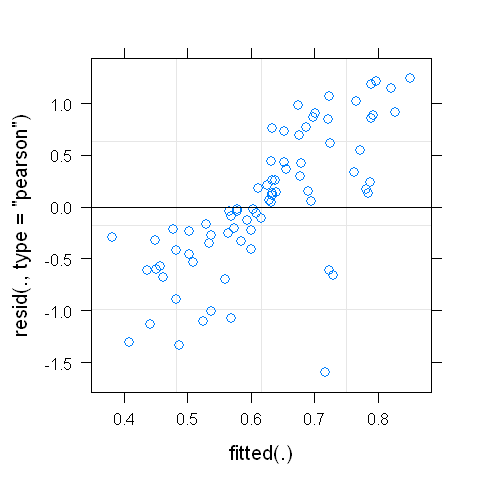

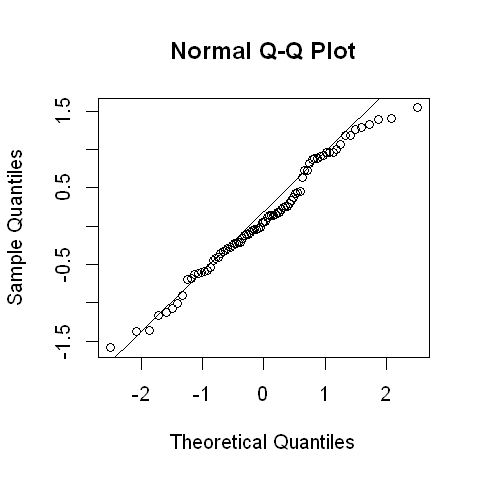

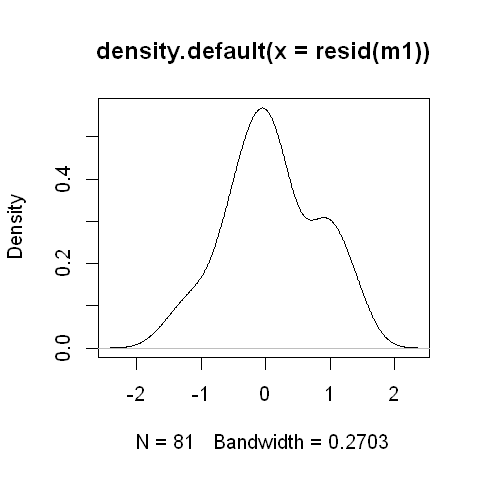

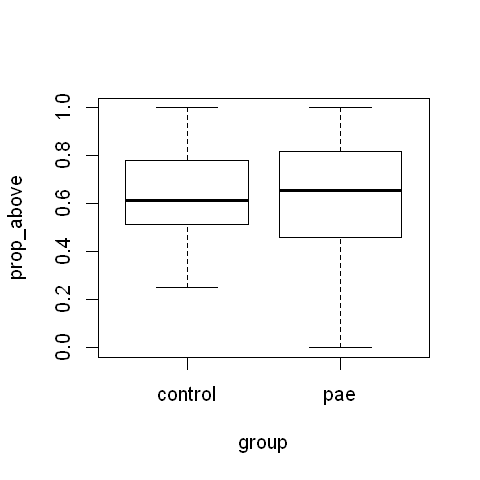

In [10]:
weighted.mean(data[data$area=='ca1' & data$group=='control',]$prop_above,data[data$area=='ca1' & data$group=='control',]$n_rip)
weighted.mean(data[data$area=='ca1' & data$group=='pae',]$prop_above,data[data$area=='ca1' & data$group=='pae',]$n_rip)

m1 = glmer(prop_above ~ group + (1|rat/session), weights=n_rip, data=data[data$area=='ca1',],family="binomial")
m1.null = glmer(prop_above ~ 1 + (1|rat/session), weights=n_rip, data=data[data$area=='ca1',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_above ~ group, data = data[data$area == "ca1",])



[1] 0.6004274

[1] 0.4384902

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,822.5876,831.0242,-408.2938,816.5876,NA,NA,NA
m1,4,817.9492,829.1979,-404.9746,809.9492,6.638493,1,0.009979834


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: prop_above ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]
Weights: n_rip

     AIC      BIC   logLik deviance df.resid 
   817.9    829.2   -405.0    809.9      119 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.20848 -0.28932 -0.05196  0.29173  2.37353 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.16435  0.4054  
 rat         (Intercept) 0.02776  0.1666  
Number of obs: 123, groups:  session:rat, 123; rat, 8

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.3227     0.1289   2.505 0.012256 *  
grouppae     -0.5707     0.1717  -3.324 0.000887 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.745

Residual deviance: 75.311 on 119 degrees of freedom (ratio: 0.633)


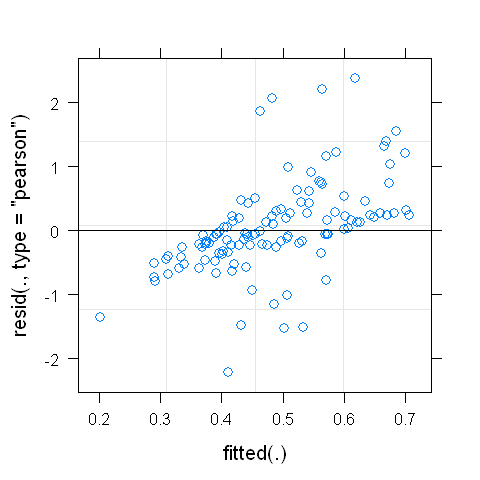

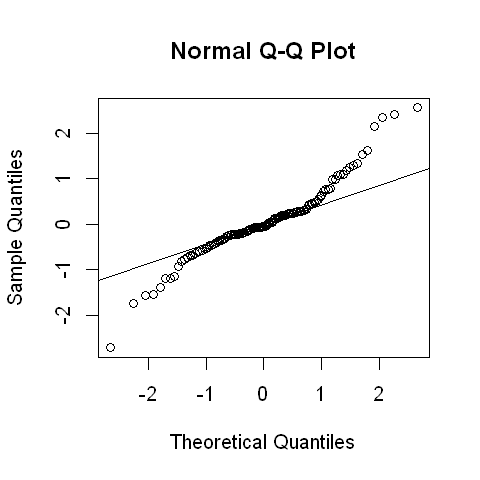

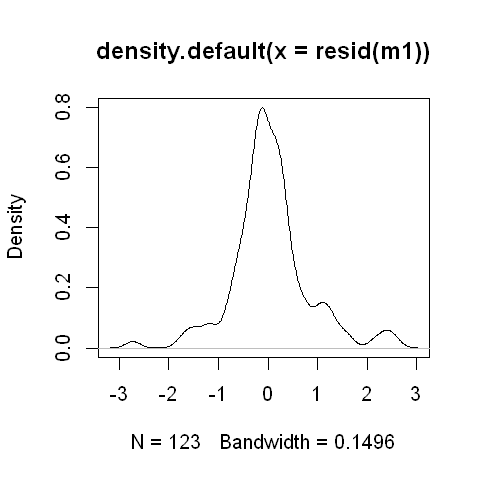

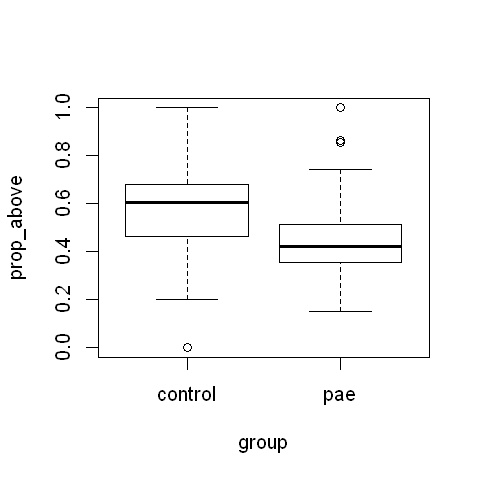

In [12]:
weighted.mean(data[data$area=='ca3' & data$group=='control',]$prop_above,data[data$area=='ca3' & data$group=='control',]$n_rip)
weighted.mean(data[data$area=='ca3' & data$group=='pae',]$prop_above,data[data$area=='ca3' & data$group=='pae',]$n_rip)

m1 = glmer(prop_above ~ group + (1|rat/session), weights=n_rip, data=data[data$area=='ca3',],family="binomial")
m1.null = glmer(prop_above ~ 1 + (1|rat/session), weights=n_rip, data=data[data$area=='ca3',],family="binomial")

anova(m1.null, m1)  

summary(m1)
overdisp.glmer(m1)

options(repr.plot.width = 4, repr.plot.height = 4)

plot(m1)
qqnorm(resid(m1))
qqline(resid(m1))
plot(density(resid(m1)))

plot(prop_above ~ group, data = data[data$area == "ca3",])


# Excitatory Inhibitory contribution to ripples

In [34]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/i_e_balance/post_processed/e_i_df.csv')


data$groupup = factor(data$group, levels=c('control', 'pae'))
data$rat = factor(data$rat)
data$session = factor(data$session)
data$area = factor(data$area, levels=c('ca1', 'ca3'))

summary(data)

       X                            session           rat           group     
 Min.   :  0.0   LEM3246_S20190629164240:  983   LEM3216:5540   control:7486  
 1st Qu.: 32.0   LEM3246_S20190701153855:  978   LEM3246:4117   pae    :8512  
 Median : 92.0   LEM3216_S20190718101925:  698   LEM3206:2498                 
 Mean   :170.4   LEM3216_S20190720145517:  577   LEM3124:1541                 
 3rd Qu.:246.0   LEM3216_S20190723165548:  518   LEM3116:1357                 
 Max.   :982.0   LEM3116_S20180717110938:  438   LEM3120: 448                 
                 (Other)                :11806   (Other): 497                 
  area          pyr_mean         int_mean            e_i_diff       
 ca1: 4531   Min.   :-1.592   Min.   :-1.809950   Min.   :-18.4471  
 ca3:11467   1st Qu.: 1.445   1st Qu.:-0.001109   1st Qu.:  0.2419  
             Median : 2.339   Median : 0.744120   Median :  1.5051  
             Mean   : 2.419   Mean   : 0.933184   Mean   :  1.4862  
             3rd Qu.: 3

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,16535.88,16555.13,-8264.938,16529.88,NA,NA,NA
m1,4,16529.82,16555.50,-8260.911,16521.82,8.05292,1,0.004543038


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: e_i_diff_trans ~ group + (1 | session)
   Data: data[data$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
 16529.8  16555.5  -8260.9  16521.8     4527 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.6535 -0.5952 -0.0174  0.5919  4.2919 

Random effects:
 Groups   Name        Variance Std.Dev.
 session  (Intercept) 1.001    1.001   
 Residual             2.161    1.470   
Number of obs: 4531, groups:  session, 73

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   1.3920     0.2191 63.0224   6.353 2.64e-08 ***
grouppae     -0.7944     0.2710 65.9592  -2.931  0.00464 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.808

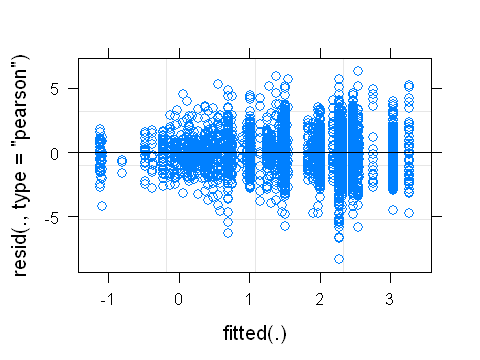

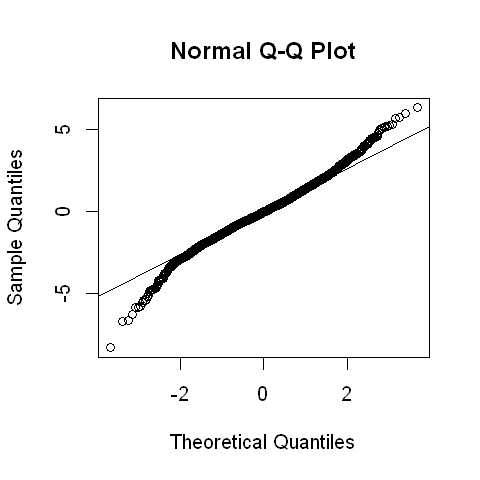

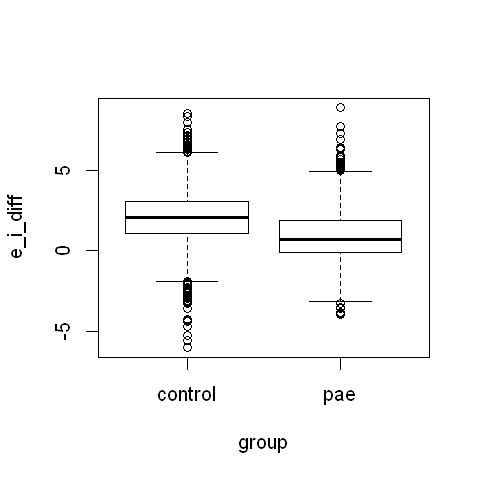

In [89]:
data$e_i_diff_trans = (data$e_i_diff)

m1 = lmer(e_i_diff_trans ~ group + (1 | session), data = data[data$area == "ca1",],REML=FALSE)
m1.null = lmer(e_i_diff_trans ~ 1 + (1 | session), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)

summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(e_i_diff ~ group, data = data[data$area == "ca1",])


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,44249.56,44271.60,-22121.78,44243.56,NA,NA,NA
m1,4,44235.16,44264.55,-22113.58,44227.16,16.40051,1,5.127148e-05


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: e_i_diff ~ group + (1 | session)
   Data: data[data$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
 44235.2  44264.6 -22113.6  44227.2    11463 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-12.0220  -0.5884   0.0005   0.5808   8.3839 

Random effects:
 Groups   Name        Variance Std.Dev.
 session  (Intercept) 0.8896   0.9432  
 Residual             2.6928   1.6410  
Number of obs: 11467, groups:  session, 117

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)   1.3839     0.1596 125.8703   8.670 1.82e-14 ***
grouppae     -0.8295     0.1967 119.6530  -4.216 4.85e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.811

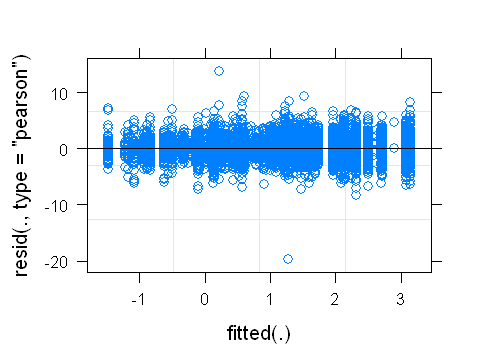

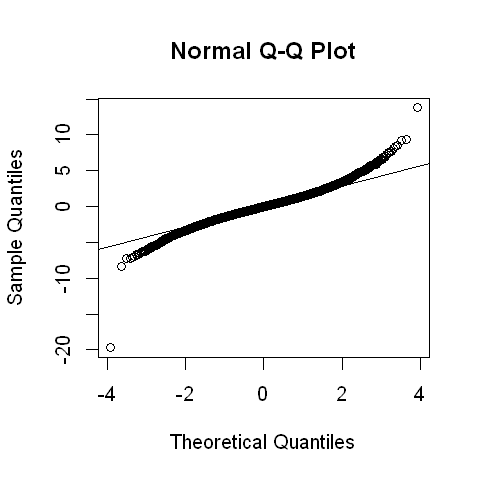

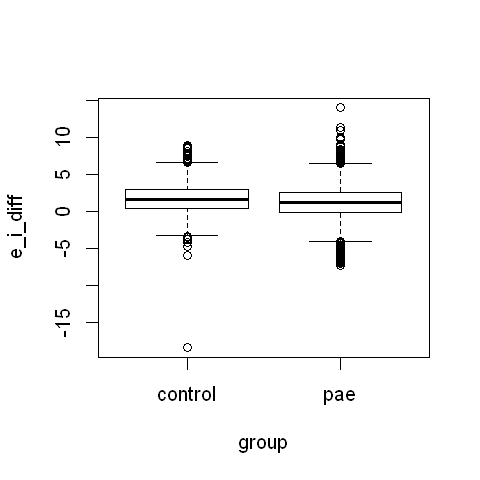

In [90]:

m1 = lmer(e_i_diff ~ group + (1 | session), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(e_i_diff ~ 1 + (1 | session), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)
summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(e_i_diff ~ group, data = data[data$area == "ca3",])


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,55671.03,55690.28,-27832.51,55665.03,NA,NA,NA
m1,4,55666.45,55692.13,-27829.23,55658.45,6.575382,1,0.01033988


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: e_i_peak_diff_trans ~ group + (1 | rat)
   Data: data[data$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
 55666.5  55692.1 -27829.2  55658.5     4527 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0559 -0.6095 -0.0344  0.5888  4.6955 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept)   951.1   30.84  
 Residual             12588.2  112.20  
Number of obs: 4531, groups:  rat, 10

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   486.28      15.27   8.42  31.847  4.5e-10 ***
grouppae      -71.30      22.43   8.57  -3.179   0.0119 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.681

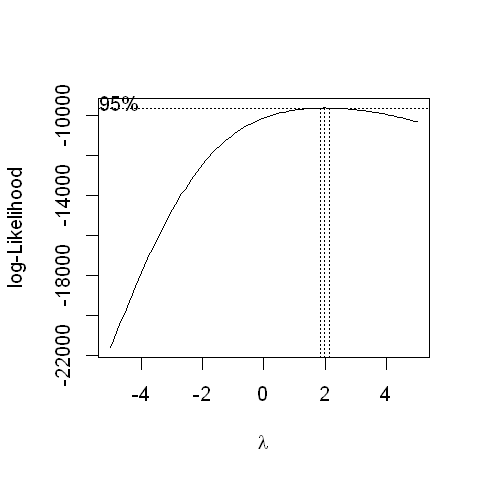

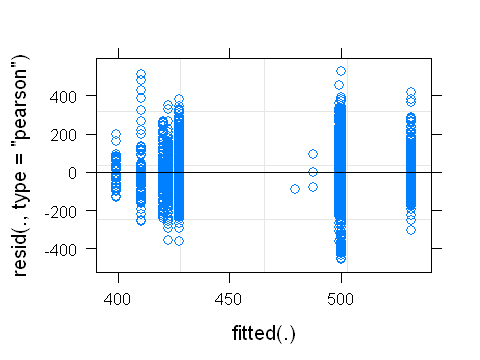

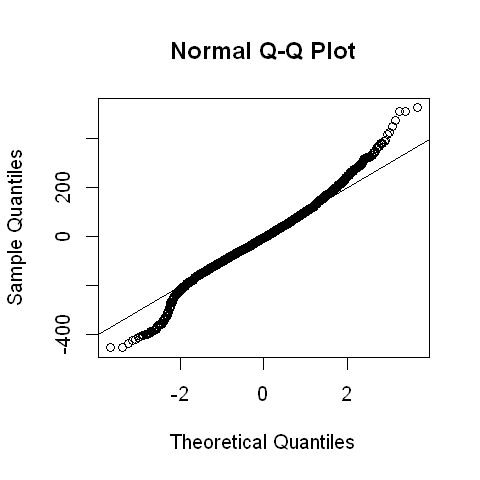

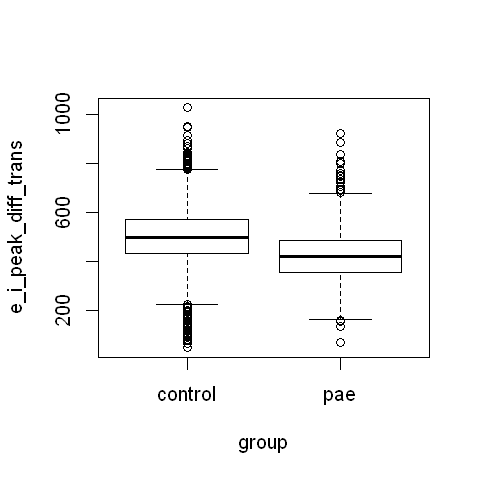

In [86]:
data$e_i_peak_diff_trans = (data$e_i_peak_diff+20)
m1 = lm(e_i_peak_diff_trans ~ group, data = data[data$area == "ca1",])
result = boxcox(m1, lambda = seq(-5,5,0.5))
lambda = result$x[which.max(result$y)]
data$e_i_peak_diff_trans = data$e_i_peak_diff_trans^lambda

m1 = lmer(e_i_peak_diff_trans ~ group + (1 | rat), data = data[data$area == "ca1",],REML=FALSE)
m1.null = lmer(e_i_peak_diff_trans ~ 1 + (1 | rat), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)

summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(e_i_peak_diff_trans ~ group, data = data[data$area == "ca1",])


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,52413.30,52435.34,-26203.65,52407.30,NA,NA,NA
m1,4,52414.15,52443.54,-26203.07,52406.15,1.146165,1,0.2843534


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: e_i_peak_diff_trans ~ group + (1 | rat)
   Data: data[data$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
 52414.1  52443.5 -26203.1  52406.1    11463 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.6770 -0.6469 -0.0025  0.6391  8.5821 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept) 0.3958   0.6291  
 Residual             5.6400   2.3749  
Number of obs: 11467, groups:  rat, 8

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  19.3232     0.3291  7.3605  58.713 4.19e-11 ***
grouppae     -0.5708     0.4915  6.1702  -1.161    0.288    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.670

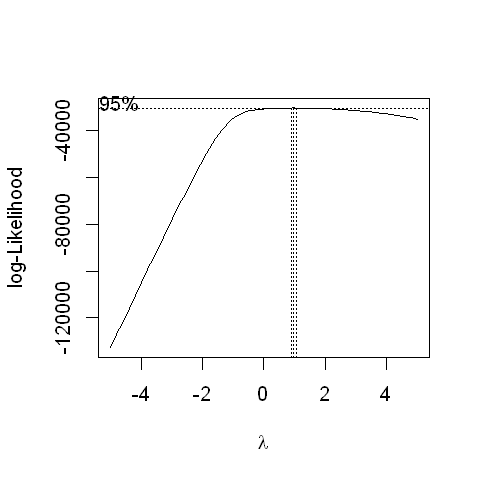

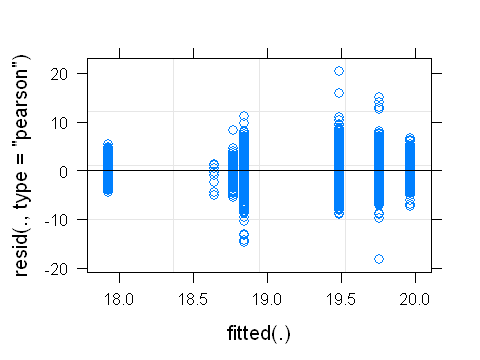

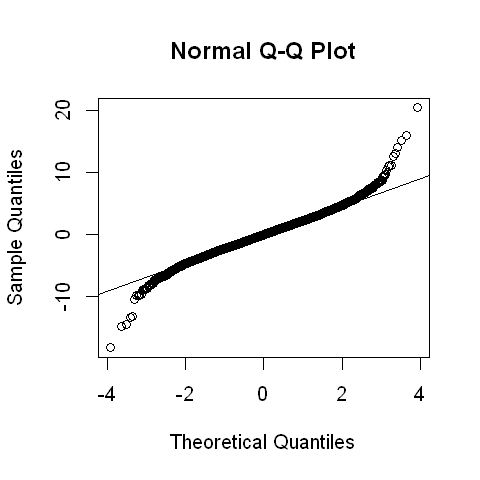

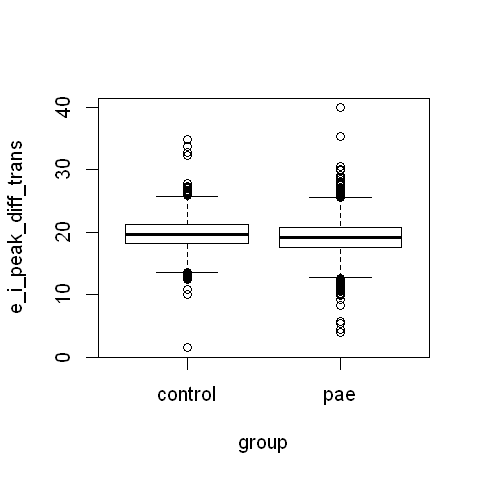

In [85]:
data$e_i_peak_diff_trans = (data$e_i_peak_diff+20)
m1 = lm(e_i_peak_diff_trans ~ group, data = data[data$area == "ca3",])
result = boxcox(m1, lambda = seq(-5,5,0.5))
lambda = result$x[which.max(result$y)]
data$e_i_peak_diff_trans = data$e_i_peak_diff_trans^lambda

m1 = lmer(e_i_peak_diff_trans ~ group + (1 | rat), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(e_i_peak_diff_trans ~ 1 + (1 | rat), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)

summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(e_i_peak_diff_trans ~ group, data = data[data$area == "ca3",])


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-12821.66,-12795.99,6414.832,-12829.66,NA,NA,NA
m1,5,-12820.33,-12788.23,6415.164,-12830.33,0.6630057,1,0.4155008


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: peak_delay ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
-12820.3 -12788.2   6415.2 -12830.3     4526 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-11.3026  -0.3705  -0.0146   0.3928  12.2072 

Random effects:
 Groups      Name        Variance  Std.Dev.
 session:rat (Intercept) 0.0004158 0.02039 
 rat         (Intercept) 0.0001188 0.01090 
 Residual                0.0033680 0.05803 
Number of obs: 4531, groups:  session:rat, 73; rat, 10

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)
(Intercept)  0.003445   0.007329  8.732326   0.470    0.650
grouppae    -0.008379   0.010189  7.090679  -0.822    0.438

Correlation of Fixed Effects:
         (Intr)
grouppae -0.719

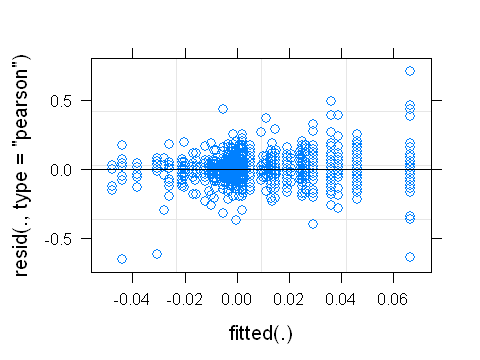

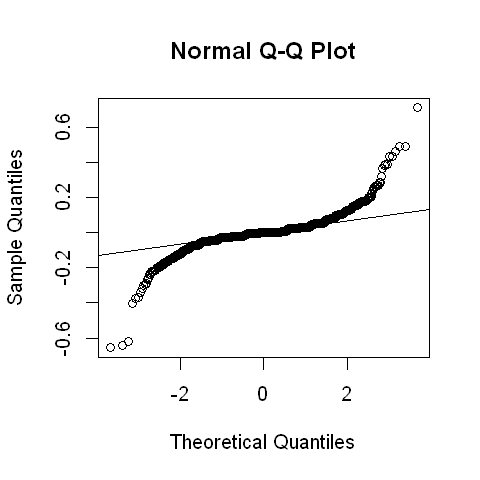

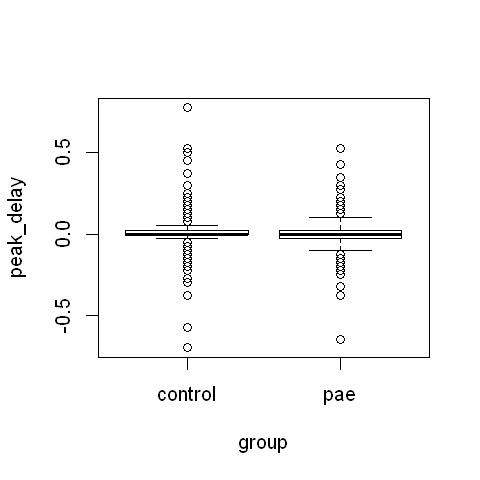

In [51]:

m1 = lmer(peak_delay ~ group + (1 | rat/session), data = data[data$area == "ca1",],REML=FALSE)
m1.null = lmer(peak_delay ~ 1 + (1 | rat/session), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)

summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(peak_delay ~ group, data = data[data$area == "ca1",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,3,-41007.12,-40985.08,20506.56,-41013.12,NA,NA,NA
m1,4,-41008.80,-40979.41,20508.40,-41016.80,3.682586,1,0.05498352


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: peak_delay ~ group + (1 | session)
   Data: data[data$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
-41008.8 -40979.4  20508.4 -41016.8    11463 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-10.0386  -0.5177  -0.0211   0.5149  13.5673 

Random effects:
 Groups   Name        Variance  Std.Dev.
 session  (Intercept) 0.0000402 0.00634 
 Residual             0.0016218 0.04027 
Number of obs: 11467, groups:  session, 117

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)  
(Intercept)  0.001869   0.001427 75.624644   1.310   0.1940  
grouppae    -0.003352   0.001738 78.807450  -1.929   0.0573 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.821

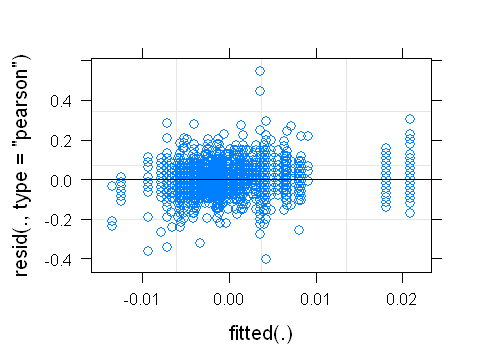

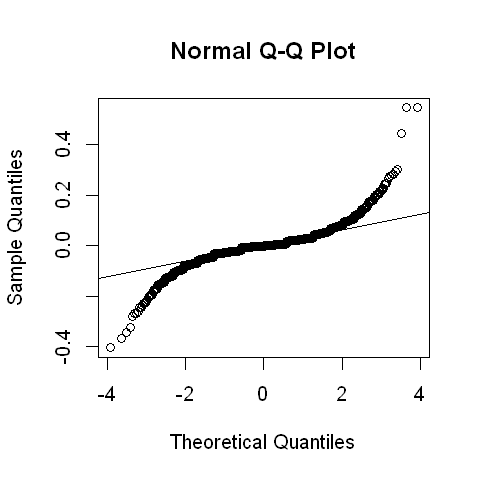

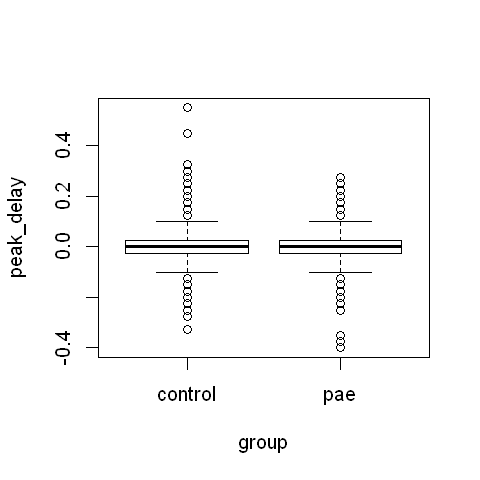

In [91]:

m1 = lmer(peak_delay ~ group + (1 | session), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(peak_delay ~ 1 + (1 | session), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)

summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(peak_delay ~ group, data = data[data$area == "ca3",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-4635.895,-4610.221,2321.948,-4643.895,NA,NA,NA
m1,5,-4642.307,-4610.213,2326.153,-4652.307,8.411276,1,0.003729008


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: pyr_peak_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
 -4642.3  -4610.2   2326.2  -4652.3     4526 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2633 -0.6396 -0.0570  0.6396  3.4016 

Random effects:
 Groups      Name        Variance  Std.Dev.
 session:rat (Intercept) 0.0086284 0.09289 
 rat         (Intercept) 0.0003951 0.01988 
 Residual                0.0202001 0.14213 
Number of obs: 4531, groups:  session:rat, 73; rat, 10

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  2.63611    0.02270 17.76645 116.150  < 2e-16 ***
grouppae    -0.10956    0.02939 10.46522  -3.727  0.00363 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.772

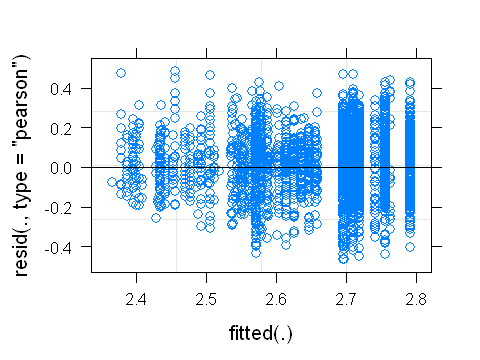

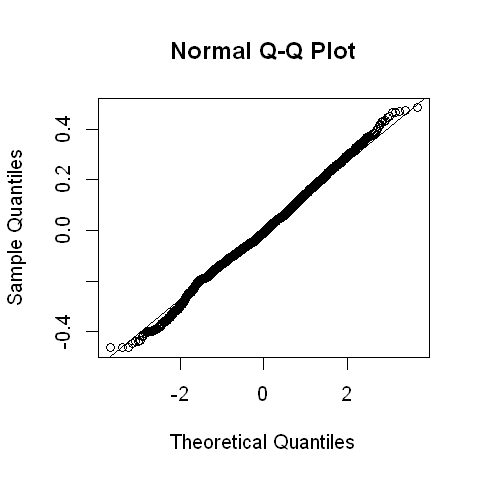

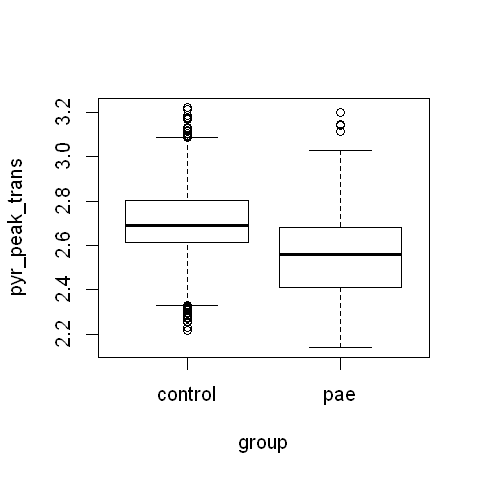

In [64]:
data$pyr_peak_trans = log(data$pyr_peak+10)

m1 = lmer(pyr_peak_trans ~ group + (1 | rat/session), data = data[data$area == "ca1",],REML=FALSE)
m1.null = lmer(pyr_peak_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)

summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(pyr_peak_trans ~ group, data = data[data$area == "ca1",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-12660.30,-12630.91,6334.149,-12668.30,NA,NA,NA
m1,5,-12659.94,-12623.21,6334.972,-12669.94,1.645725,1,0.1995418


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: pyr_peak_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
-12659.9 -12623.2   6335.0 -12669.9    11462 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7832 -0.5899 -0.0209  0.5829  8.7718 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.003942 0.06279 
 rat         (Intercept) 0.001669 0.04086 
 Residual                0.018906 0.13750 
Number of obs: 11467, groups:  session:rat, 117; rat, 8

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  2.61130    0.02396  8.52560 108.985 1.05e-14 ***
grouppae    -0.04770    0.03462  6.56411  -1.378    0.213    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.692

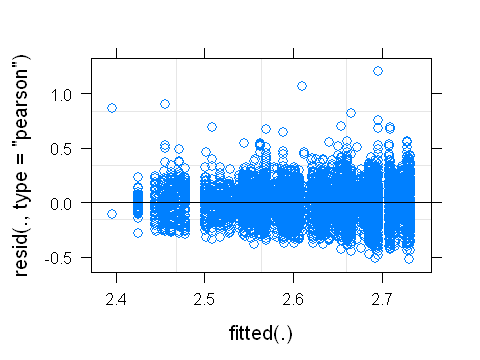

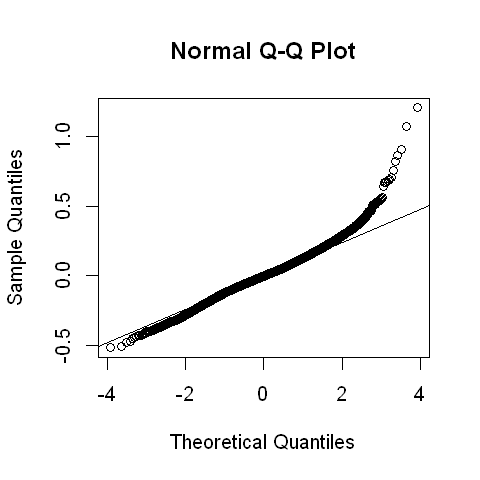

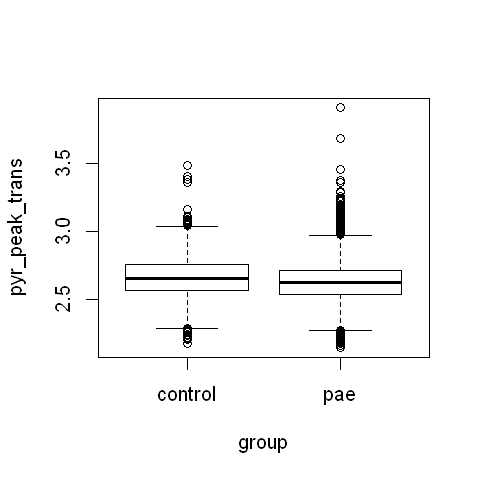

In [3]:
data$pyr_peak_trans = log(data$pyr_peak+10)

m1 = lmer(pyr_peak_trans ~ group + (1 | rat/session), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(pyr_peak_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)

summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(pyr_peak_trans ~ group, data = data[data$area == "ca3",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-4840.218,-4814.544,2424.109,-4848.218,NA,NA,NA
m1,5,-4838.245,-4806.151,2424.122,-4848.245,0.02626755,1,0.8712486


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: int_peak_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
 -4838.2  -4806.2   2424.1  -4848.2     4526 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3952 -0.6402 -0.1383  0.4599  5.4996 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.002693 0.05189 
 rat         (Intercept) 0.001551 0.03939 
 Residual                0.019570 0.13989 
Number of obs: 4531, groups:  session:rat, 73; rat, 10

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  2.47258    0.02283 9.55226 108.304 4.41e-16 ***
grouppae     0.00525    0.03235 8.24662   0.162    0.875    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.706

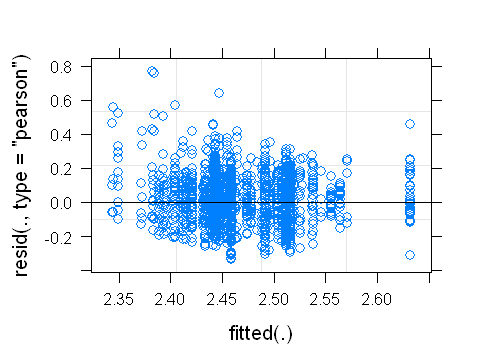

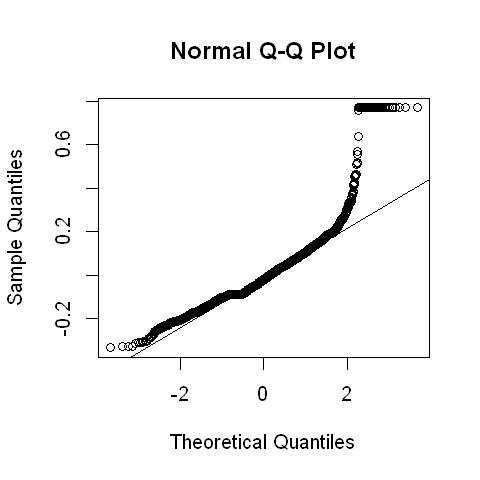

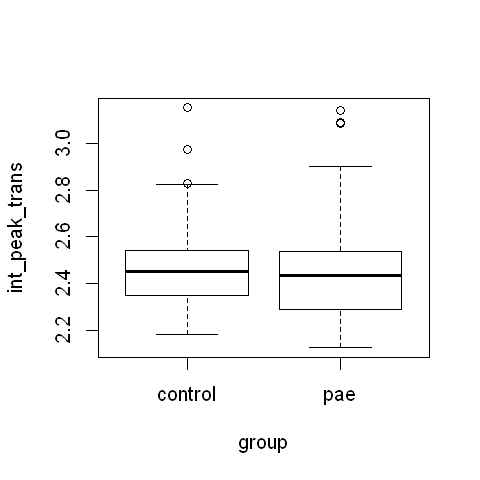

In [5]:
data$int_peak_trans = log(data$int_peak+10)

m1 = lmer(int_peak_trans ~ group + (1 | rat/session), data = data[data$area == "ca1",],REML=FALSE)
m1.null = lmer(int_peak_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)

summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(int_peak_trans ~ group, data = data[data$area == "ca1",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-14420.25,-14390.87,7214.127,-14428.25,NA,NA,NA
m1,5,-14421.38,-14384.65,7215.691,-14431.38,3.126641,1,0.07702229


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: int_peak_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
-14421.4 -14384.6   7215.7 -14431.4    11462 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0643 -0.6839 -0.0421  0.5913  7.4336 

Random effects:
 Groups      Name        Variance  Std.Dev.
 session:rat (Intercept) 0.0037333 0.06110 
 rat         (Intercept) 0.0003121 0.01767 
 Residual                0.0162104 0.12732 
Number of obs: 11467, groups:  session:rat, 117; rat, 8

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  2.47114    0.01447 9.74476 170.736   <2e-16 ***
grouppae     0.04202    0.01937 6.69568   2.169   0.0685 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.747

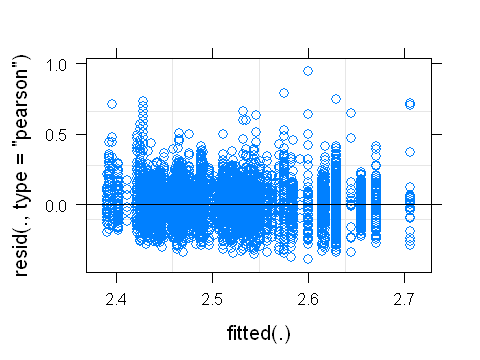

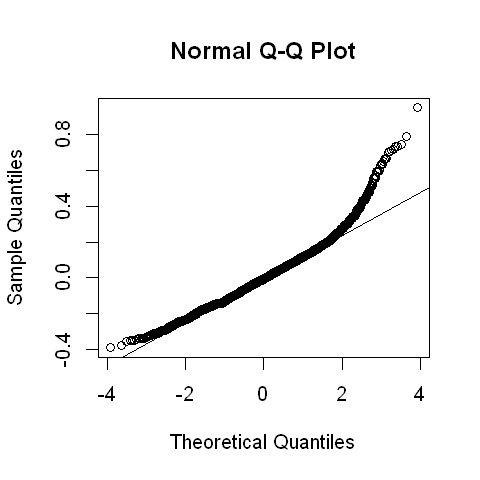

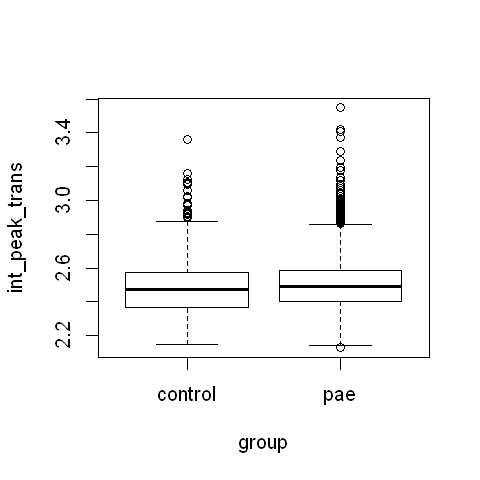

In [10]:
data$int_peak_trans = log(data$int_peak+10)

m1 = lmer(int_peak_trans ~ group + (1 | rat/session), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(int_peak_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)

summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(int_peak_trans ~ group, data = data[data$area == "ca3",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-7573.868,-7548.193,3790.934,-7581.868,NA,NA,NA
m1,5,-7579.041,-7546.948,3794.521,-7589.041,7.173221,1,0.007399979


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: pyr_mean_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
 -7579.0  -7546.9   3794.5  -7589.0     4526 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4203 -0.6450 -0.0434  0.6000  4.0505 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.005787 0.076075
 rat         (Intercept) 0.000030 0.005477
 Residual                0.010534 0.102635
Number of obs: 4531, groups:  session:rat, 73; rat, 10

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  2.47513    0.01675 20.88355 147.757  < 2e-16 ***
grouppae    -0.07525    0.02084  9.75053  -3.611  0.00495 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.804

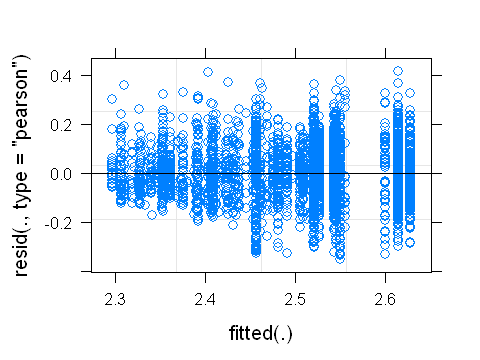

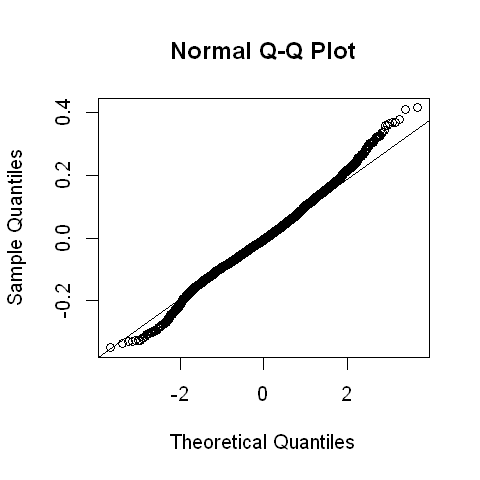

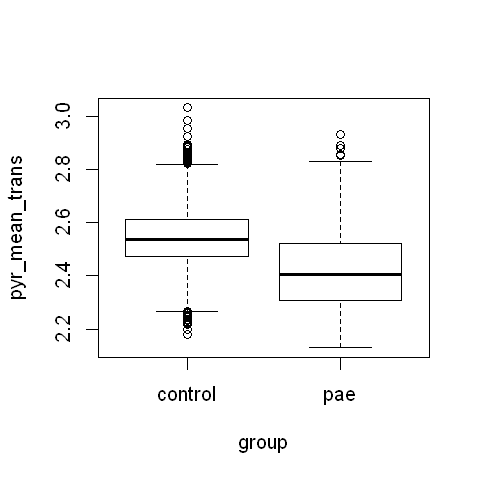

In [15]:
data$pyr_mean_trans = log(data$pyr_mean+10)

m1 = lmer(pyr_mean_trans ~ group + (1 | rat/session), data = data[data$area == "ca1",],REML=FALSE)
m1.null = lmer(pyr_mean_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)

summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(pyr_mean_trans ~ group, data = data[data$area == "ca1",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-18961.97,-18932.58,9484.985,-18969.97,NA,NA,NA
m1,5,-18960.63,-18923.90,9485.317,-18970.63,0.663354,1,0.4153783


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: pyr_mean_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
-18960.6 -18923.9   9485.3 -18970.6    11462 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6123 -0.6211 -0.0440  0.5898  7.2573 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.002984 0.05462 
 rat         (Intercept) 0.001253 0.03540 
 Residual                0.010888 0.10434 
Number of obs: 11467, groups:  session:rat, 117; rat, 8

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  2.47819    0.02053  5.88708 120.692 3.23e-11 ***
grouppae    -0.02556    0.02983  4.52035  -0.857    0.434    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.688

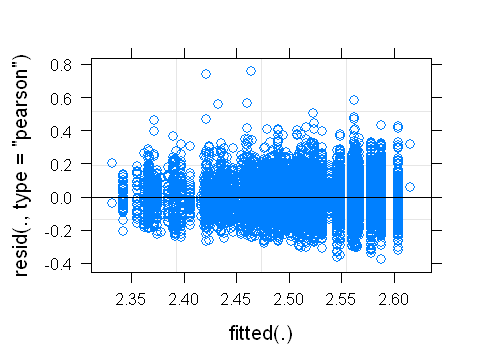

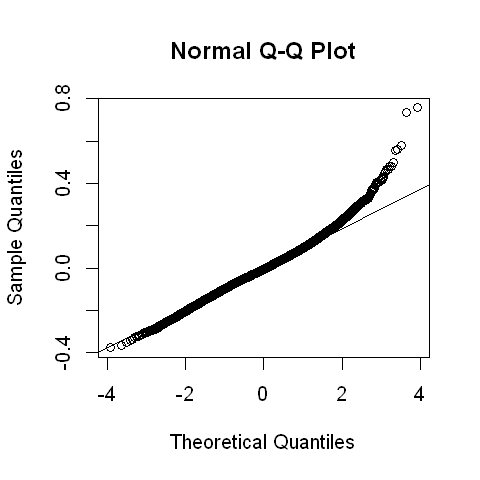

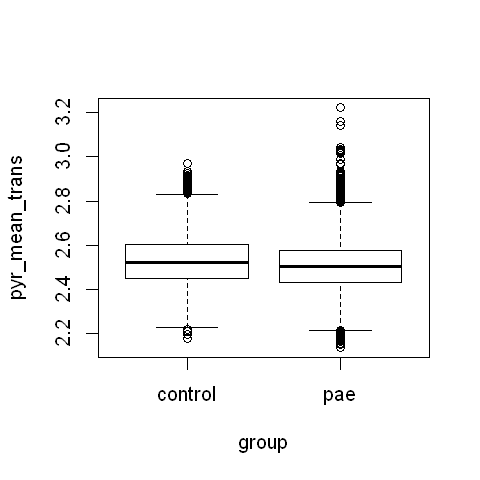

In [16]:
data$pyr_mean_trans = log(data$pyr_mean+10)

m1 = lmer(pyr_mean_trans ~ group + (1 | rat/session), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(pyr_mean_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)

summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(pyr_mean_trans ~ group, data = data[data$area == "ca3",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-16350.48,-16324.81,8179.241,-16358.48,NA,NA,NA
m1,5,-16348.54,-16316.44,8179.268,-16358.54,0.05342302,1,0.8172105


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: int_mean_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca1", ]

     AIC      BIC   logLik deviance df.resid 
-16348.5 -16316.4   8179.3 -16358.5     4526 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4042 -0.5438 -0.1653  0.5610  6.0739 

Random effects:
 Groups      Name        Variance  Std.Dev.
 session:rat (Intercept) 0.0003050 0.01746 
 rat         (Intercept) 0.0001301 0.01140 
 Residual                0.0015371 0.03921 
Number of obs: 4531, groups:  session:rat, 73; rat, 10

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) -0.154617   0.006855 10.072216 -22.557 5.91e-10 ***
grouppae     0.002231   0.009635  8.355796   0.232    0.822    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.711

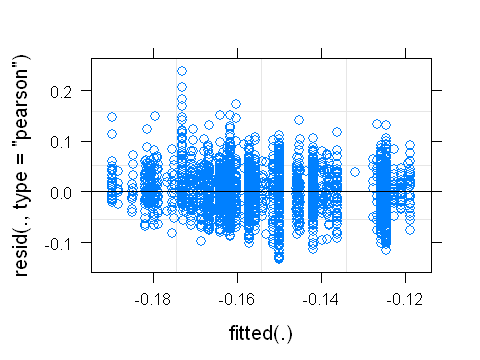

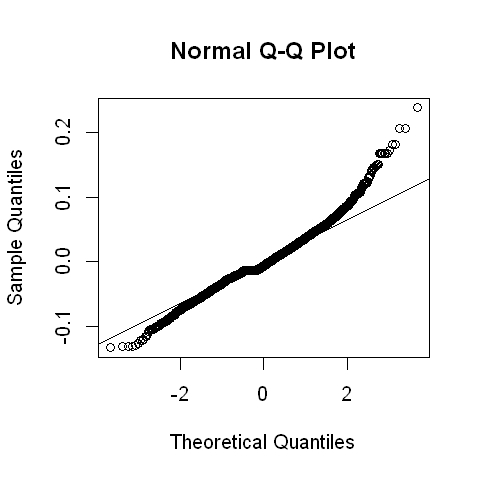

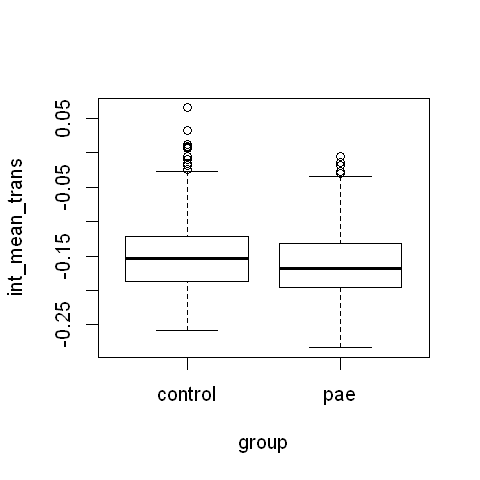

In [22]:
data$int_mean_trans = log(log(log(data$int_mean+10)))

m1 = lmer(int_mean_trans ~ group + (1 | rat/session), data = data[data$area == "ca1",],REML=FALSE)
m1.null = lmer(int_mean_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca1",], REML=FALSE)
anova(m1.null, m1)

summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(int_mean_trans ~ group, data = data[data$area == "ca1",])

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-39223.85,-39194.46,19615.92,-39231.85,NA,NA,NA
m1,5,-39227.18,-39190.45,19618.59,-39237.18,5.33594,1,0.02089007


Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: int_mean_trans ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
-39227.2 -39190.4  19618.6 -39237.2    11462 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5907 -0.6869 -0.0402  0.6169  6.9823 

Random effects:
 Groups      Name        Variance  Std.Dev.
 session:rat (Intercept) 5.084e-04 0.022548
 rat         (Intercept) 3.057e-05 0.005529
 Residual                1.861e-03 0.043137
Number of obs: 11467, groups:  session:rat, 117; rat, 8

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) -0.150682   0.004950  9.164022 -30.438  1.6e-10 ***
grouppae     0.020279   0.006551  6.073495   3.096   0.0209 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.756

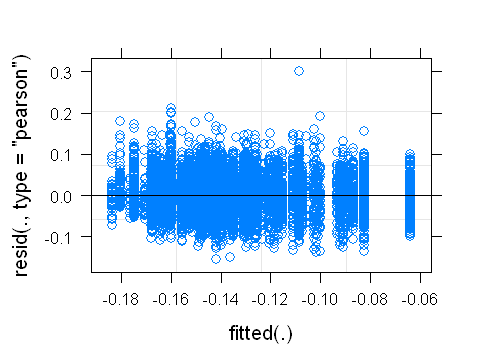

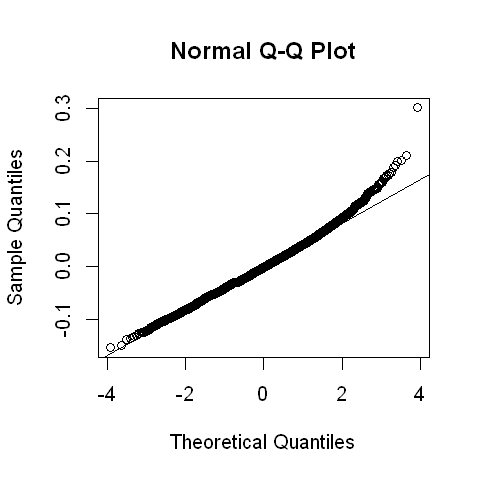

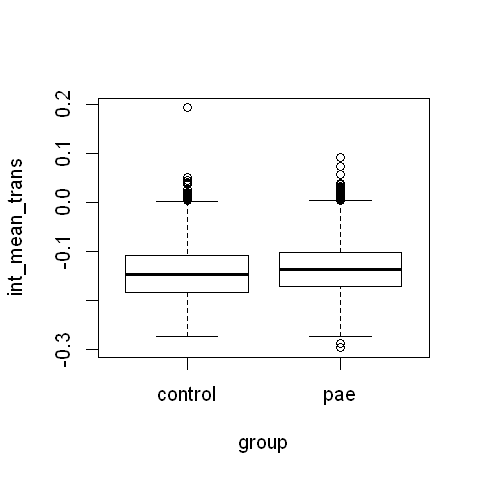

In [31]:
data$int_mean_trans = log(log(log(data$int_mean+10)))

m1 = lmer(int_mean_trans ~ group + (1 | rat/session), data = data[data$area == "ca3",],REML=FALSE)
m1.null = lmer(int_mean_trans ~ 1 + (1 | rat/session), data = data[data$area == "ca3",], REML=FALSE)
anova(m1.null, m1)

summary(m1)
options(repr.plot.width = 4, repr.plot.height = 3)
plot(m1)
options(repr.plot.width = 4, repr.plot.height = 4)
qqnorm(resid(m1))
qqline(resid(m1))

plot(int_mean_trans ~ group, data = data[data$area == "ca3",])